In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the correct dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Display the first few rows and basic info
print("--- Data Head ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

# Check for missing values
print("\n--- Missing Values ---")
print(df.isna().sum())

--- Data Head ---
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB

--- Missing Values ---
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


**Observation:** The `Date` column is currently an object and needs to be converted to a datetime format for time-series analysis. The data is otherwise clean with no missing values.

**1.2 Cleaning and Preparing the Data**
The primary cleaning task is to convert the `Date` column to a proper datetime object.

In [19]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Confirm the data type has changed
print("--- Corrected Data Info ---")
df.info()

--- Corrected Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


#### **Part 2: Data Analysis**

[cite\_start]In this section, we perform descriptive and statistical analysis on the cleaned data[cite: 99].

**2.1 Descriptive Statistical Analysis**
[cite\_start]Here, we calculate the mean, median, mode, and standard deviation for the `Sales` and `Unit` columns as specified in the project brief[cite: 110, 111].

In [4]:
# Calculate descriptive statistics
print("--- Descriptive Statistics for Sales and Unit Columns ---")
print(df[['Sales', 'Unit']].describe())

# Calculate the mode
print("\n--- Mode for Sales and Unit Columns ---")
print(df[['Sales', 'Unit']].mode())

--- Descriptive Statistics for Sales and Unit Columns ---
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000

--- Mode for Sales and Unit Columns ---
   Sales  Unit
0  22500     9


**2.2 Group-Wise Sales Performance**
[cite\_start]We use the `GroupBy()` function to identify the states and demographic groups with the highest and lowest sales[cite: 112, 113].

In [20]:
# Identify highest and lowest sales by State
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print("\n--- Total Sales by State ---")
print(state_sales)

# Identify highest and lowest sales by Demographic Group
demographic_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print("\n--- Total Sales by Demographic Group ---")
print(demographic_sales)


--- Total Sales by State ---
State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

--- Total Sales by Demographic Group ---
Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64


#### **Part 3: Data Visualization Dashboard**

[cite\_start]This section provides key visualizations for the sales and marketing dashboard, using Seaborn as the preferred library[cite: 116, 122].

**3.1 Statistical Visualizations**
[cite\_start]We use a box plot for visualizing descriptive statistics [cite: 130] [cite\_start]and a distribution plot for sales data[cite: 131].

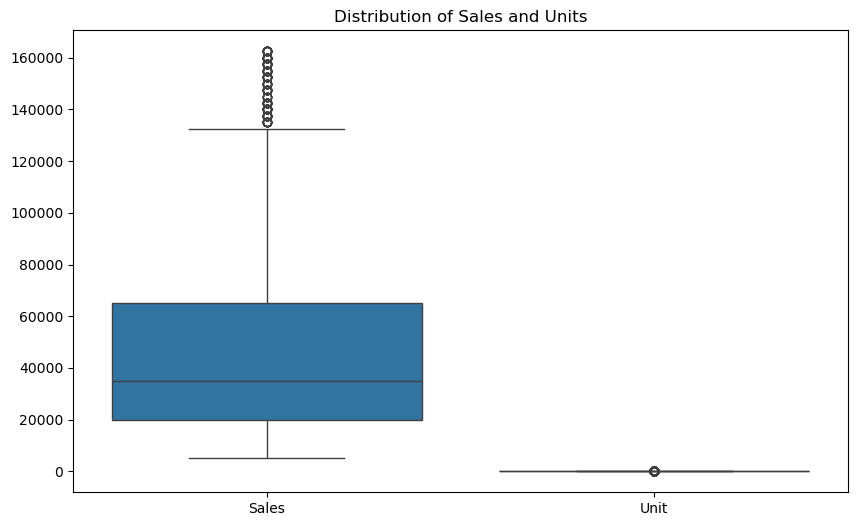

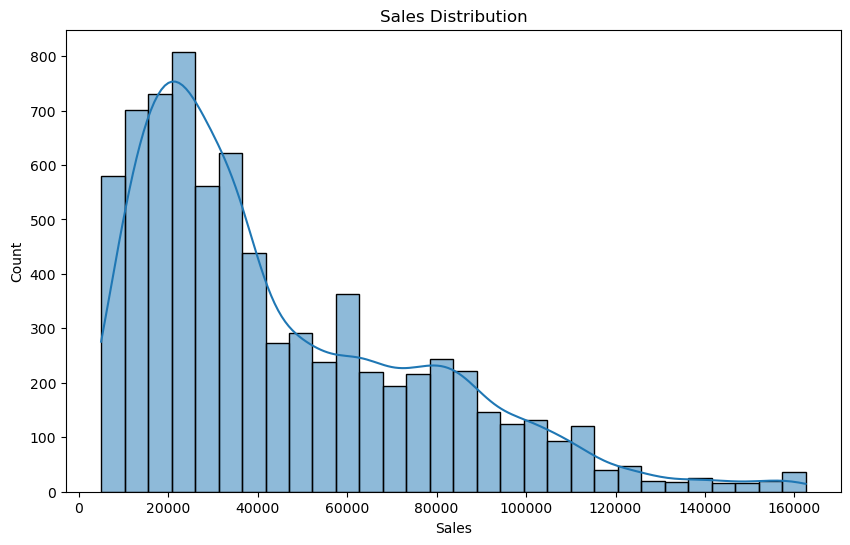

In [24]:
# Box plot for Sales and Unit columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title('Distribution of Sales and Units')
plt.show()

# Distribution plot for the Sales column
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Sales Distribution')
plt.show()

**3.2 Business Performance Visualizations**

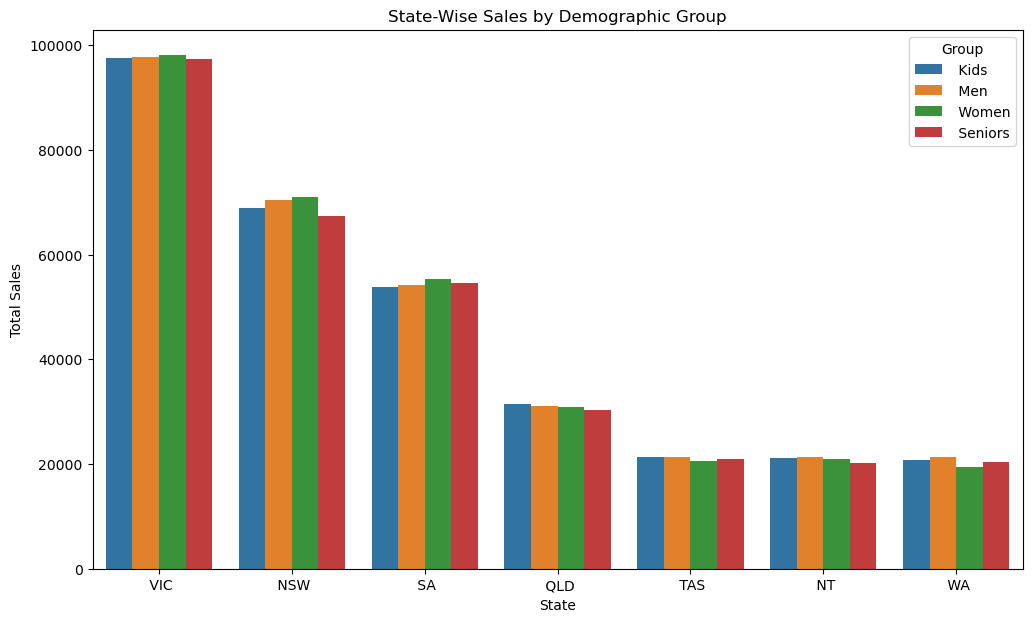

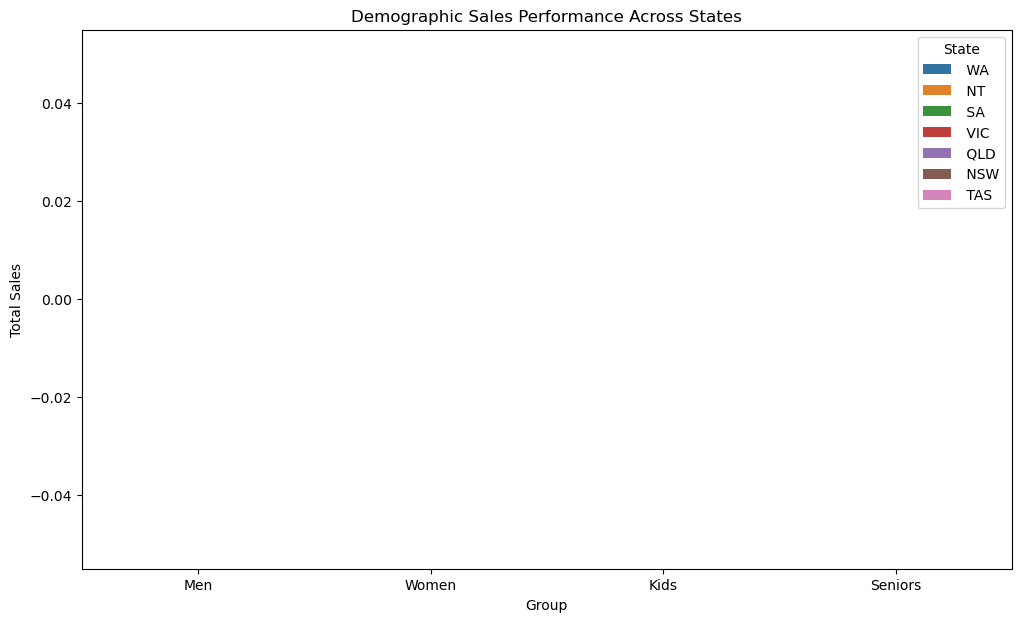

In [25]:
# State-wise sales by demographic group
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='State', y='Sales', hue='Group', errorbar=None, order=state_sales.index)
plt.title('State-Wise Sales by Demographic Group')
plt.ylabel('Total Sales')
plt.show()

# Demographic group sales across states
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Group', y='Sales', hue='State', errorbar=None, order=['Men', 'Women', 'Kids', 'Seniors'])
plt.title('Demographic Sales Performance Across States')
plt.ylabel('Total Sales')
plt.show()


**3.3 Time-Series and Time-of-Day Visualizations**
[cite\_start]Here we visualize the daily and weekly sales trends and perform the required time-of-day analysis to find peak sales hours[cite: 120, 122].


--- Quarterly Sales ---
Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

--- Monthly Sales (Q4) ---
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64


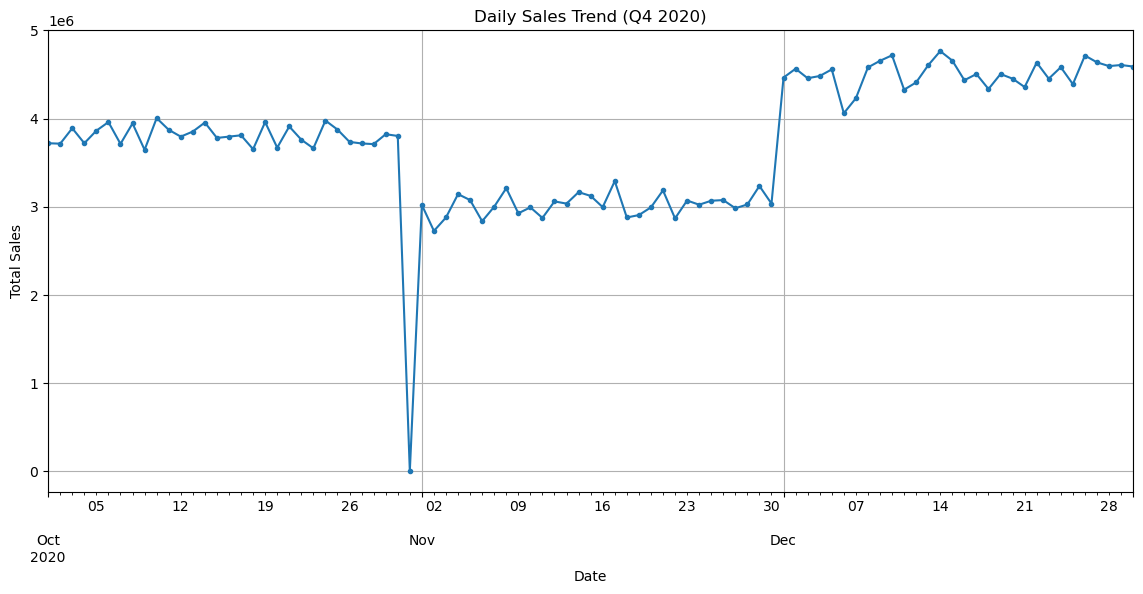

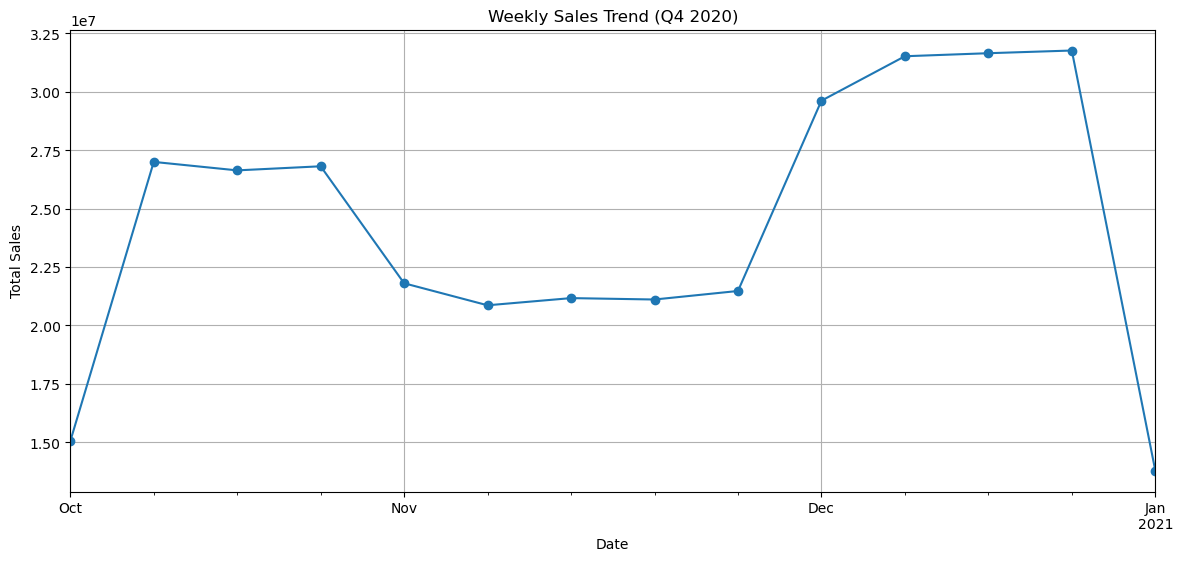

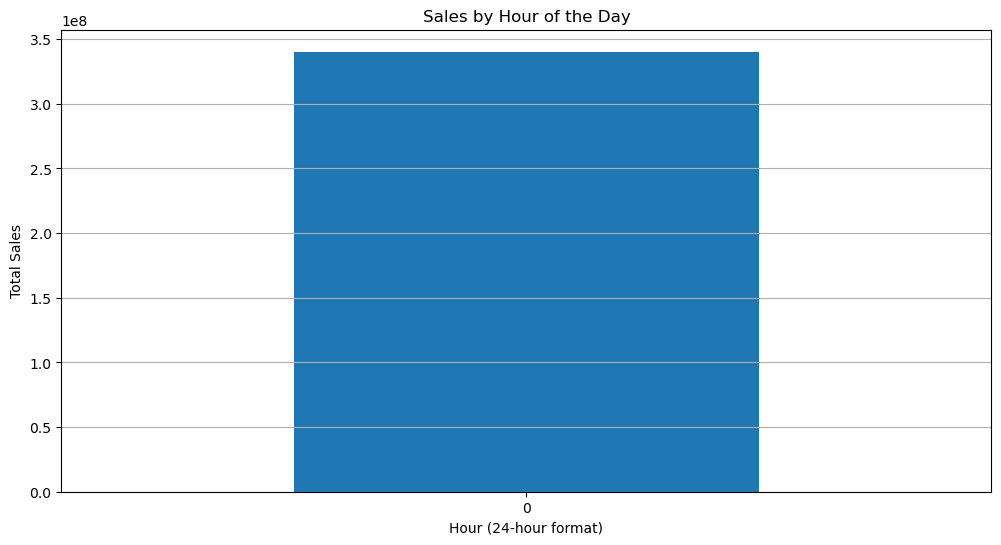

In [10]:

# Set 'Date' as the index for time-based resampling
df['Date'] = pd.to_datetime(df['Date'])        # Convert to datetime
df_time = df.set_index('Date')                 # Set as index

# Generate reports
daily_report = df_time.resample('D')['Sales'].sum()
weekly_report = df_time.resample('W')['Sales'].sum()
monthly_report = df_time.resample('ME')['Sales'].sum()
quarterly_report = df_time.resample('QE')['Sales'].sum()

print("\n--- Quarterly Sales ---")
print(quarterly_report)
print("\n--- Monthly Sales (Q4) ---")
print(monthly_report)


# Daily Sales Trend Chart
plt.figure(figsize=(14, 6))
daily_report.plot(kind='line', marker='.', linestyle='-')
plt.title('Daily Sales Trend (Q4 2020)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Weekly Sales Trend Chart
plt.figure(figsize=(14, 6))
weekly_report.plot(kind='line', marker='o', linestyle='-')
plt.title('Weekly Sales Trend (Q4 2020)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Time-of-the-day analysis
df['Hour'] = df['Date'].dt.hour
sales_by_hour = df.groupby('Hour')['Sales'].sum()

plt.figure(figsize=(12, 6))
sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

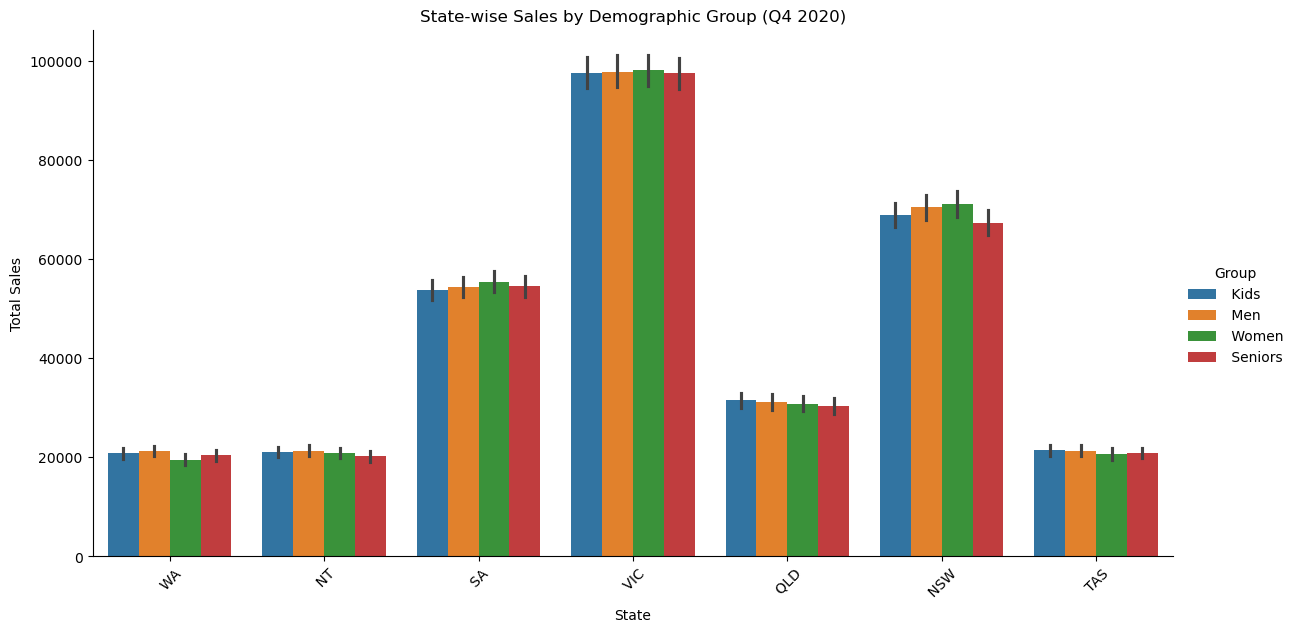

<Figure size 1200x600 with 0 Axes>

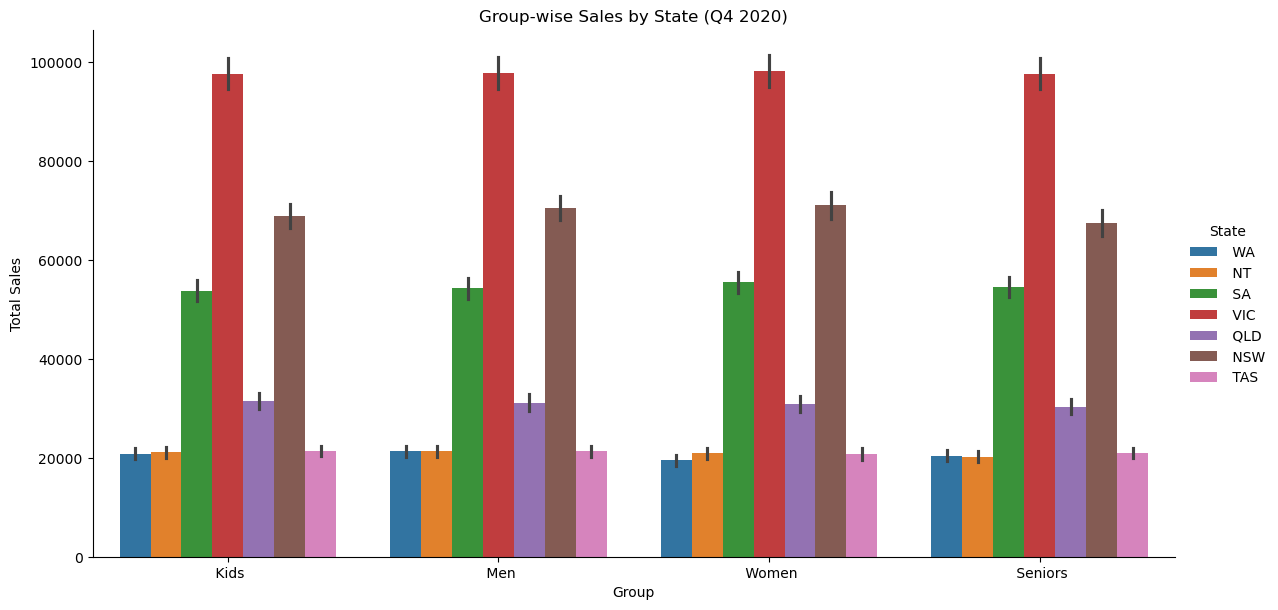

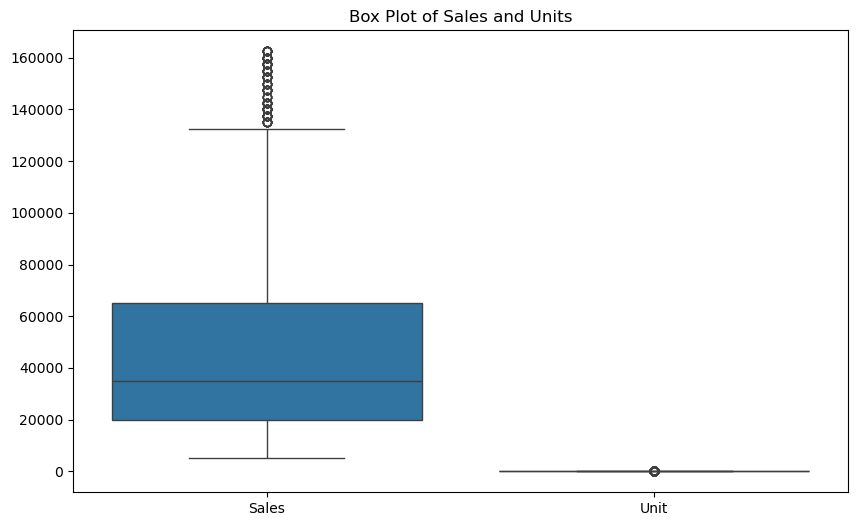

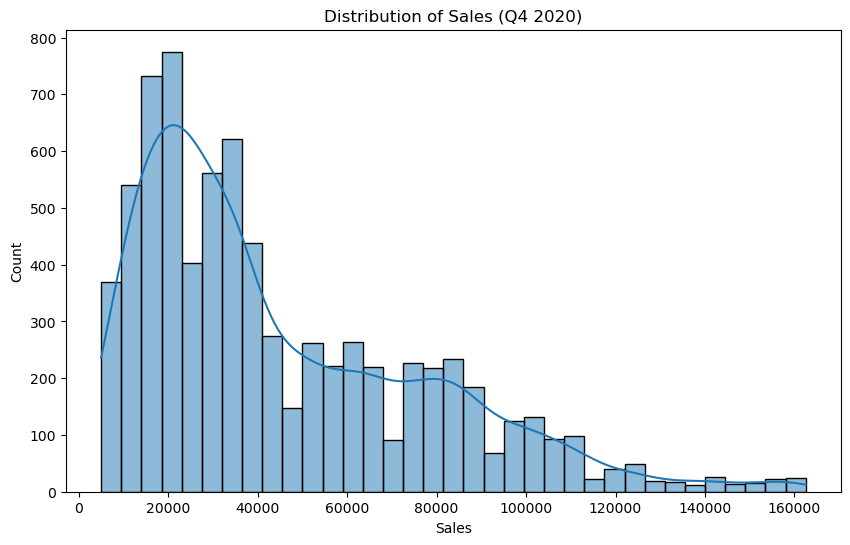

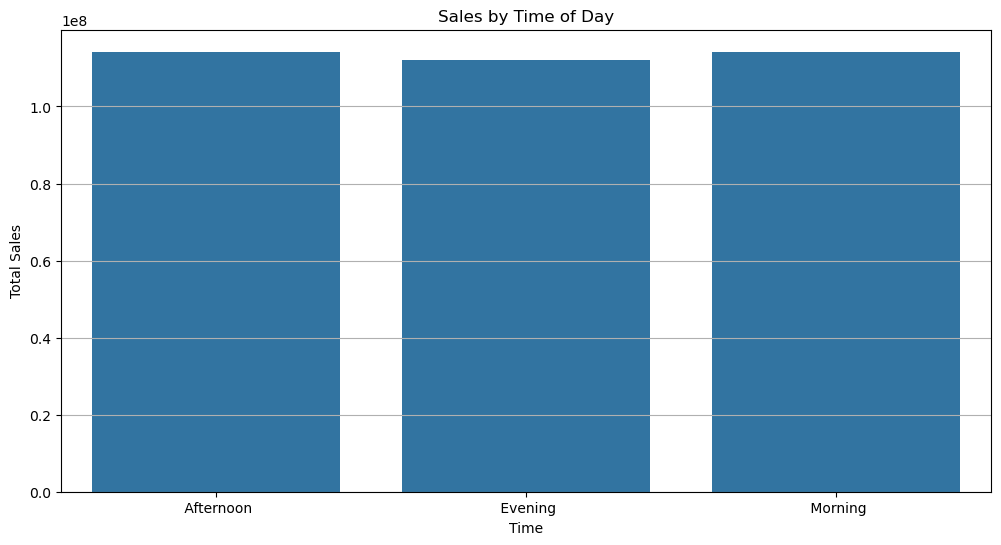

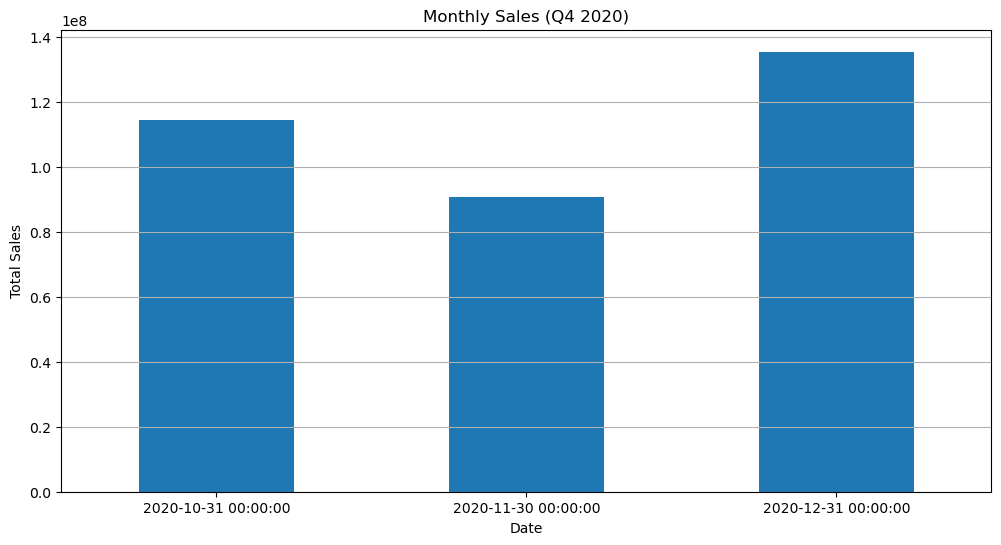

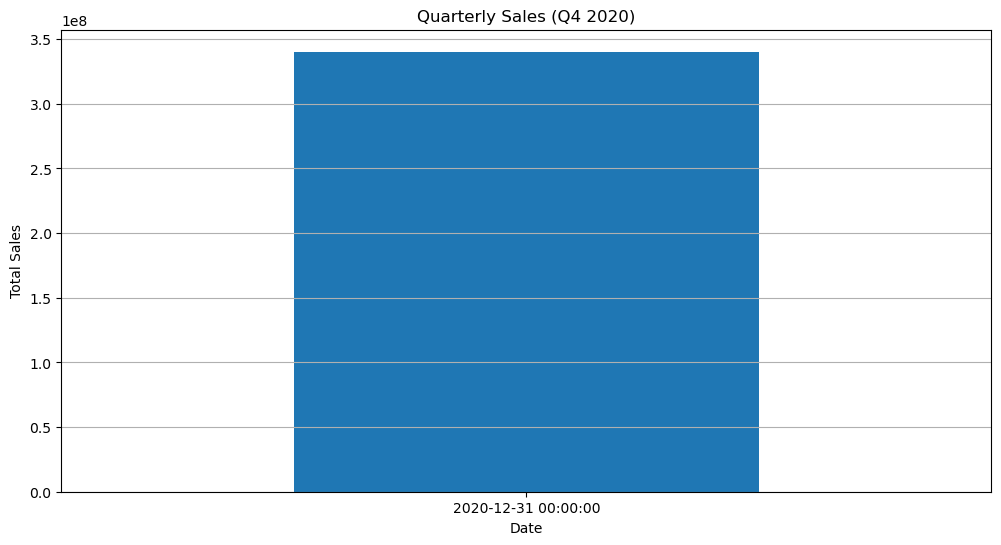

In [17]:
# State-wise sales by demographic group
plt.figure(figsize=(12, 6))
sns.catplot(x='State', y='Sales', hue='Group', kind='bar', data=df, height=6, aspect=2)
plt.title('State-wise Sales by Demographic Group (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Group-wise sales by state
plt.figure(figsize=(12, 6))
sns.catplot(x='Group', y='Sales', hue='State', kind='bar', data=df, height=6, aspect=2)
plt.title('Group-wise Sales by State (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Box plot for descriptive statistics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title('Box Plot of Sales and Units')
plt.show()

# Seaborn distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales (Q4 2020)')
plt.xlabel('Sales')
plt.show()

# Corrected time-of-day analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='Sales', data=df.groupby('Time')['Sales'].sum().reset_index())
plt.title('Sales by Time of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Monthly and Quarterly Sales Charts
monthly_report = df_time.resample('ME')['Sales'].sum()
quarterly_report = df_time.resample('QE')['Sales'].sum()


plt.figure(figsize=(12, 6))
monthly_report.plot(kind='bar')
plt.title('Monthly Sales (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
quarterly_report.plot(kind='bar')
plt.title('Quarterly Sales (Q4 2020)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#### **Part 4: Data Normalization**

As a final step, we perform data normalization. [cite\_start]This technique is useful for machine learning applications but is done after the primary business analysis to maintain the interpretability of the results[cite: 106, 107].

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy to keep the original values
df_normalized = df.copy()
numeric_cols = ['Sales', 'Unit']
scaler = MinMaxScaler()

df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n--- Sample of Normalized Data (for ML applications) ---")
print(df_normalized[['Sales', 'Unit']].head())


--- Sample of Normalized Data (for ML applications) ---
      Sales      Unit
0  0.095238  0.095238
1  0.095238  0.095238
2  0.031746  0.031746
3  0.206349  0.206349
4  0.015873  0.015873
